In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 10, 100)

In [3]:
y = (3 * x) + 2

In [4]:
y = y + np.random.normal(0, 0.8, 100)

In [5]:
y.shape

(100,)

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2)

In [275]:
def fit(X, y, iterations, learning_rate, w, b):
    weights = w
    bias = b
    for i in range(iterations):
        # print(f'Iteration {i}')
        w1, b1 = gradient_descent(X, y, learning_rate, weights, bias) 
        weights = w1
        bias = b1
    return weights, bias

def gradient_descent(X, y, learning_rate, w, b):
    y_pred = predict(X, w, b)
    m = X.shape[0]
    # print(m)
    # print(F'YPred = {y_pred}')
    # print(-(2 * (X.T).dot(y - y_pred)))
    # cost = (1/(2*m)) * np.sum(np.square(y_pred - y))
    # print(f'Cost {cost}')
    db=(np.sum(y_pred-y))/m
    dw=np.dot(y_pred-y, X)/m

    weights = w - learning_rate * dw
    # print(f'W: {weights}')
    bias = b-learning_rate * db
    return weights, bias

def predict(X, w, b):
    # print(X.shape)
    # print(w)
    # print((X * w))
    return (X * w) + b 

In [276]:
def runn(X, y, iterations=3, learning_rate=14):
    m = train_x.shape[0]
    weights = 0
    bias = 0
    w, b = fit(X, y, iterations, learning_rate, weights, bias)
    return w, b

In [277]:
wn, bn = runn(train_x, train_y, 8, 0.05)

In [252]:
preds = predict(test_x, wn, bn)

In [255]:
np.sum(np.abs(preds - test_y))/len(test_x)

1.5350924937954242

Text(0.5, 1.0, 'Data plot')

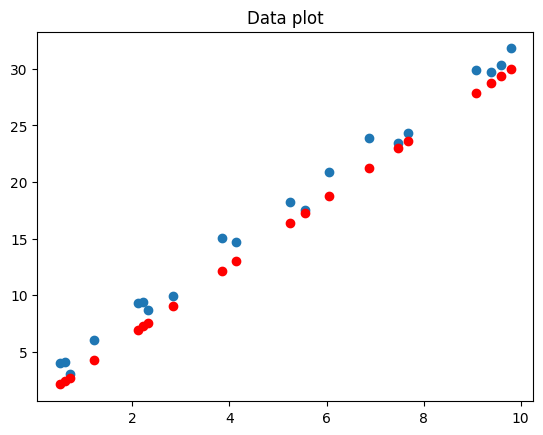

In [266]:
fig, ax = plt.subplots()
ax.scatter(test_x, test_y)
ax.scatter(test_x, preds, c='r')
ax.set_title('Data plot')

In [281]:
rates = [1, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]
steps = [2, 4, 8, 16, 32]

best_rate = 0
best_step = 0
best_cost = float('inf')
for rate in rates:
    for epoch in steps:
        wn, bn = runn(train_x, train_y, epoch, rate)
        preds = predict(test_x, wn, bn)
        test_cost = np.sum(np.abs(preds - test_y))/len(test_x)
        if test_cost < best_cost:
            best_cost = test_cost
            best_rate = rate
            best_step = epoch
        # print(f'Cost with steps{epoch} and lr{rate} is: {test_cost}')
print(f'!!! Best cost is {best_cost} using rate: {best_rate} and {best_step}steps.')

!!! Best cost is 0.8855192680456447 using rate: 0.05 and 32steps.


Text(0.5, 1.0, 'Data plot')

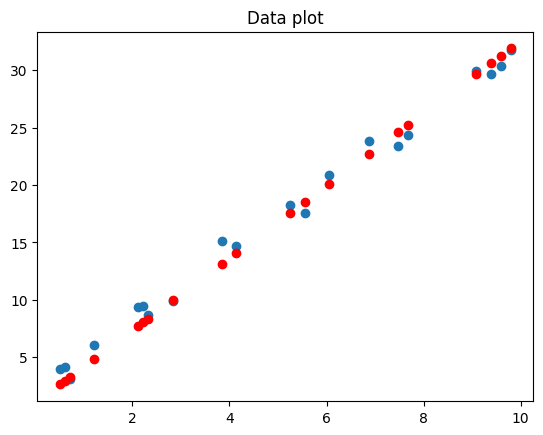

In [286]:
# Let's plot the best results

# First get the weights and bias
w_best, b_best = runn(train_x, train_y, 32, 0.05)
best_preds = predict(test_x, w_best, b_best)

# Plotting
fig, ax = plt.subplots()
ax.scatter(test_x, test_y)
ax.scatter(test_x, best_preds, c='r')
ax.set_title('Data plot')